In [131]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [379]:
file_path = '/content/drive/MyDrive/USC Coursework/Artificial Intelligence - CSCE 580/CSCE580-Fall2024-Nayeem-SharedInfo/DriverTraining-ForInClassLearning-2024.csv'

import pandas as pd

driving_df = pd.read_csv(file_path)
driving_df

,class_date,city,state,zip_code,dob,gender
0,8/17/24,Richburg,South Carolina,29729,11/30/07,Male
1,8/10/24,Bluffton,South Carolina,29910-7957,10/16/07,Male
2,8/14/24,Hampton,South Carolina,29924,7/3/08,Female
3,8/9/24,Columbia,South Carolina,29210,10/10/06,Female
4,8/17/24,Irmo,South Carolina,29063,12/23/06,Female
...,...,...,...,...,...,...
16895,2/25/23,Chesnee,South Carolina,29323,11/16/05,Female
16896,2/4/23,Greenville,South Carolina,29607,5/22/07,Male
16897,2/4/23,Greenwood,South Carolina,29649,7/15/06,Female
16898,2/8/23,Boiling Springs,South Carolina,29316,2/17/06,Male


In [380]:
# find missing values in each column
display(driving_df.isnull().sum())
print('\nPercentage of data missing by each columns are displayed as rows.')
display((driving_df.isnull().sum() / len(driving_df)) * 100)

,0
class_date,0
city,6
state,6
zip_code,6
dob,133
gender,226



Percentage of data missing by each columns are displayed as rows.


,0
class_date,0.000000
city,0.035503
state,0.035503
zip_code,0.035503
dob,0.786982
gender,1.337278


In [381]:
print(len(driving_df))

16900


In [382]:
driving_df.describe()

,class_date,city,state,zip_code,dob,gender
count,16900,16894,16894,16894,16767,16674
unique,259,641,15,567,1898,2
top,8/2/24,Lexington,South Carolina,29072,9/14/07,Male
freq,271,1533,16834,1226,42,8483


In [383]:
import numpy as np

# null value rows in 'city' column
driving_df[driving_df['city'].isnull()]

,class_date,city,state,zip_code,dob,gender
16428,3/4/23,NaN,NaN,NaN,5/29/07,Female
16444,3/4/23,NaN,NaN,NaN,NaN,NaN
16471,2/18/23,NaN,NaN,NaN,11/28/06,Male
16475,4/5/23,NaN,NaN,NaN,11/15/06,Female
16495,2/15/23,NaN,NaN,NaN,6/1/06,Female
16520,2/18/23,NaN,NaN,NaN,10/8/05,Female


# ***Q4***

***a-> 2***

There are six class_date entries that have missing missing city, state, and zip codes.

We  can remove them. This will impact (b.3) But this is only 0.035503% of the entire dataset so it won't have a huge impact.

why?
There is no way to impute this data. Filling them with anything will only insert noise in the data.


For missing values in 'dob' and 'gender' column:
1. This will impact (b.1, b.2)
2. We will also remove them ('dob', 'gender'). Cause there isn't any better way to keep the data by adding values.







In [384]:
# remove rows with null values
driving_df = driving_df.dropna().reset_index(drop=True)
driving_df

,class_date,city,state,zip_code,dob,gender
0,8/17/24,Richburg,South Carolina,29729,11/30/07,Male
1,8/10/24,Bluffton,South Carolina,29910-7957,10/16/07,Male
2,8/14/24,Hampton,South Carolina,29924,7/3/08,Female
3,8/9/24,Columbia,South Carolina,29210,10/10/06,Female
4,8/17/24,Irmo,South Carolina,29063,12/23/06,Female
...,...,...,...,...,...,...
16593,2/25/23,Chesnee,South Carolina,29323,11/16/05,Female
16594,2/4/23,Greenville,South Carolina,29607,5/22/07,Male
16595,2/4/23,Greenwood,South Carolina,29649,7/15/06,Female
16596,2/8/23,Boiling Springs,South Carolina,29316,2/17/06,Male


In [385]:
# find missing values in each column
display(driving_df.isnull().sum())

,0
class_date,0
city,0
state,0
zip_code,0
dob,0
gender,0


In [386]:
driving_df['dob'] = driving_df['dob'].astype(str)
driving_df[['month','day', 'year']] = driving_df['dob'].str.split('/', expand=True)

In [387]:
for col in ['month', 'day', 'year']:
  driving_df[col] = pd.to_numeric(driving_df[col], errors='coerce').fillna(0).astype(int)

In [388]:
driving_df

,class_date,city,state,zip_code,dob,gender,month,day,year
0,8/17/24,Richburg,South Carolina,29729,11/30/07,Male,11,30,7
1,8/10/24,Bluffton,South Carolina,29910-7957,10/16/07,Male,10,16,7
2,8/14/24,Hampton,South Carolina,29924,7/3/08,Female,7,3,8
3,8/9/24,Columbia,South Carolina,29210,10/10/06,Female,10,10,6
4,8/17/24,Irmo,South Carolina,29063,12/23/06,Female,12,23,6
...,...,...,...,...,...,...,...,...,...
16593,2/25/23,Chesnee,South Carolina,29323,11/16/05,Female,11,16,5
16594,2/4/23,Greenville,South Carolina,29607,5/22/07,Male,5,22,7
16595,2/4/23,Greenwood,South Carolina,29649,7/15/06,Female,7,15,6
16596,2/8/23,Boiling Springs,South Carolina,29316,2/17/06,Male,2,17,6


In [389]:
driving_df['Class Date'] = pd.to_datetime(driving_df['class_date'], format='%m/%d/%y')
driving_df

,class_date,city,state,zip_code,dob,gender,month,day,year,Class Date
0,8/17/24,Richburg,South Carolina,29729,11/30/07,Male,11,30,7,2024-08-17
1,8/10/24,Bluffton,South Carolina,29910-7957,10/16/07,Male,10,16,7,2024-08-10
2,8/14/24,Hampton,South Carolina,29924,7/3/08,Female,7,3,8,2024-08-14
3,8/9/24,Columbia,South Carolina,29210,10/10/06,Female,10,10,6,2024-08-09
4,8/17/24,Irmo,South Carolina,29063,12/23/06,Female,12,23,6,2024-08-17
...,...,...,...,...,...,...,...,...,...,...
16593,2/25/23,Chesnee,South Carolina,29323,11/16/05,Female,11,16,5,2023-02-25
16594,2/4/23,Greenville,South Carolina,29607,5/22/07,Male,5,22,7,2023-02-04
16595,2/4/23,Greenwood,South Carolina,29649,7/15/06,Female,7,15,6,2023-02-04
16596,2/8/23,Boiling Springs,South Carolina,29316,2/17/06,Male,2,17,6,2023-02-08


In [390]:
print('year Range')
print(np.min(driving_df['year']))
print(np.max(driving_df['year']))
print('month Range')
print(np.min(driving_df['month']))
print(np.max(driving_df['month']))
print('day Range')
print(np.min(driving_df['day']))
print(np.max(driving_df['day']))


year Range
0
98
month Range
1
12
day Range
1
31


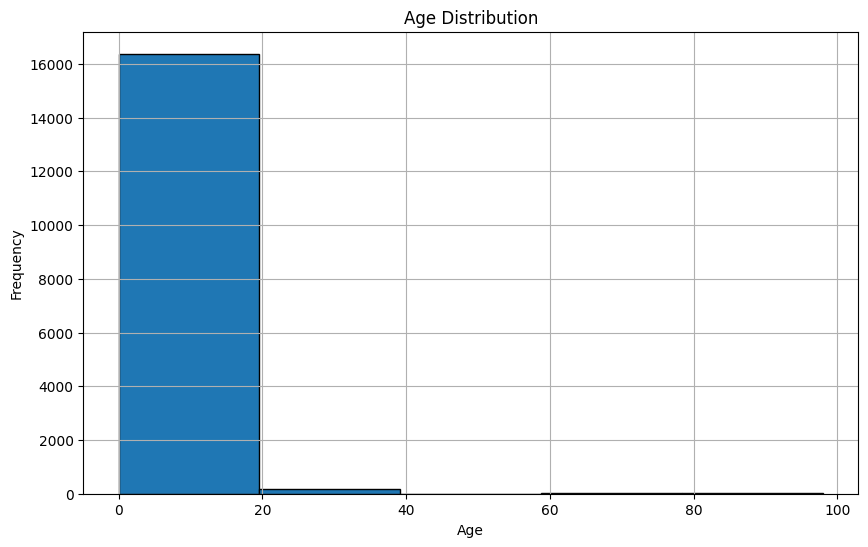

In [391]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(driving_df['year'], bins=5, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()


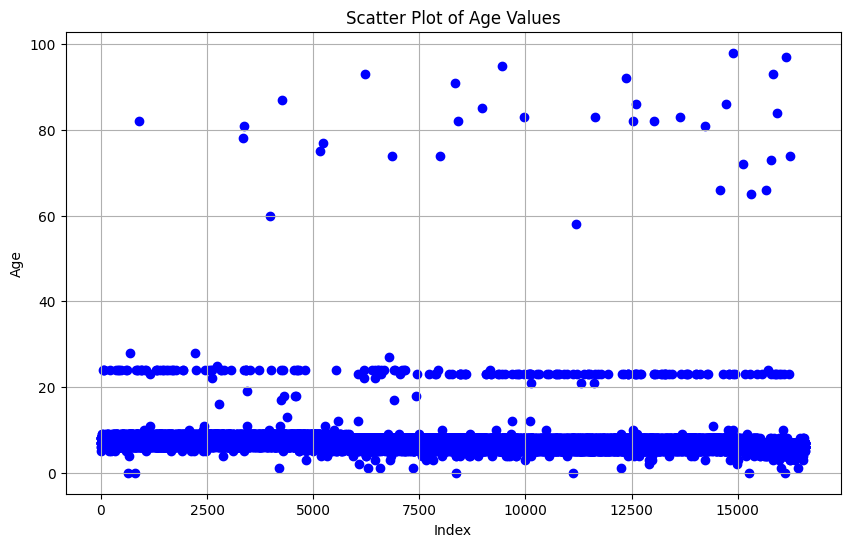

In [392]:
# Plotting a scatter plot for age values
plt.figure(figsize=(10, 6))
plt.scatter(driving_df.index, driving_df['year'], color='blue')
plt.title('Scatter Plot of Age Values')
plt.xlabel('Index')
plt.ylabel('Age')
plt.grid(True)

# Show the scatter plot
plt.show()

In [393]:
driving_df[driving_df['year'] > 33]

,class_date,city,state,zip_code,dob,gender,month,day,year,Class Date
902,8/3/24,Blythewood,South Carolina,29016,12/18/82,Male,12,18,82,2024-08-03
3354,7/13/24,Fort Mill,South Carolina,29715,9/24/78,Female,9,24,78,2024-07-13
3372,7/25/24,Greer,South Carolina,29651,4/9/81,Female,4,9,81,2024-07-25
3976,7/17/24,Fort Mill,South Carolina,29708,3/27/60,Female,3,27,60,2024-07-17
4261,6/22/24,Fort Mill,South Carolina,29715,9/21/87,Female,9,21,87,2024-06-22
5156,6/22/24,Travelers Rst,South Carolina,29690,5/25/75,Female,5,25,75,2024-06-22
5227,5/1/24,Richburg,South Carolina,29729,8/26/77,Male,8,26,77,2024-05-01
6220,1/20/24,Swansea,South Carolina,29160,12/29/93,Female,12,29,93,2024-01-20
6859,1/20/24,Lexington,South Carolina,29072,4/4/74,Male,4,4,74,2024-01-20
8000,11/11/23,Irmo,South Carolina,29063,8/30/74,Female,8,30,74,2023-11-11


# ***I am assusming you can't take this class if you're 7 year old***

In [394]:
for i in range(len(driving_df)):
  if driving_df.at[i, 'year'] < 17 and driving_df.at[i, 'year'] >= 0:
    driving_df.at[i, 'year']+= 2000
  else:
    driving_df.at[i, 'year'] += 1900

In [395]:
driving_df['date_of_birth'] = pd.to_datetime(driving_df[['year', 'month', 'day']])
driving_df

,class_date,city,state,zip_code,dob,gender,month,day,year,Class Date,date_of_birth
0,8/17/24,Richburg,South Carolina,29729,11/30/07,Male,11,30,2007,2024-08-17,2007-11-30
1,8/10/24,Bluffton,South Carolina,29910-7957,10/16/07,Male,10,16,2007,2024-08-10,2007-10-16
2,8/14/24,Hampton,South Carolina,29924,7/3/08,Female,7,3,2008,2024-08-14,2008-07-03
3,8/9/24,Columbia,South Carolina,29210,10/10/06,Female,10,10,2006,2024-08-09,2006-10-10
4,8/17/24,Irmo,South Carolina,29063,12/23/06,Female,12,23,2006,2024-08-17,2006-12-23
...,...,...,...,...,...,...,...,...,...,...,...
16593,2/25/23,Chesnee,South Carolina,29323,11/16/05,Female,11,16,2005,2023-02-25,2005-11-16
16594,2/4/23,Greenville,South Carolina,29607,5/22/07,Male,5,22,2007,2023-02-04,2007-05-22
16595,2/4/23,Greenwood,South Carolina,29649,7/15/06,Female,7,15,2006,2023-02-04,2006-07-15
16596,2/8/23,Boiling Springs,South Carolina,29316,2/17/06,Male,2,17,2006,2023-02-08,2006-02-17


In [396]:
# Calculate age by subtracting birth year from class date year
driving_df['age'] = driving_df['Class Date'].dt.year - driving_df['date_of_birth'].dt.year

# Adjust the age if the class date has not yet passed the birthday for that year
driving_df['age'] = driving_df['age'] - (
    (driving_df['Class Date'].dt.month < driving_df['date_of_birth'].dt.month) |
    ((driving_df['Class Date'].dt.month == driving_df['date_of_birth'].dt.month) &
     (driving_df['Class Date'].dt.day < driving_df['date_of_birth'].dt.day))
)

In [397]:
driving_df[driving_df['age'] > 80]

,class_date,city,state,zip_code,dob,gender,month,day,year,Class Date,date_of_birth,age
48,8/15/24,Fort Mill,South Carolina,29715,10/24/24,Female,10,24,1924,2024-08-15,1924-10-24,99
63,8/15/24,Newberry,South Carolina,29108,10/14/24,Female,10,14,1924,2024-08-15,1924-10-14,99
84,8/15/24,Lexington,South Carolina,29073,8/8/24,Male,8,8,1924,2024-08-15,1924-08-08,100
223,8/17/24,little mountain,South Carolina,29075,11/3/24,Female,11,3,1924,2024-08-17,1924-11-03,99
349,8/9/24,Columbia,South Carolina,29223,9/20/24,Female,9,20,1924,2024-08-09,1924-09-20,99
...,...,...,...,...,...,...,...,...,...,...,...,...
15909,3/4/23,Fort Mill,South Carolina,29708,8/17/23,Female,8,17,1923,2023-03-04,1923-08-17,99
15964,3/1/23,Saluda,South Carolina,29138,5/25/23,Male,5,25,1923,2023-03-01,1923-05-25,99
16013,2/25/23,Prosperity,South Carolina,29127,8/10/23,Female,8,10,1923,2023-02-25,1923-08-10,99
16086,2/25/23,Fort Mill,South Carolina,29715,8/29/23,Male,8,29,1923,2023-02-25,1923-08-29,99


In [398]:
driving_df[driving_df['age'] < 10] # how do i know if this person is 6/7 year old or 109

,class_date,city,state,zip_code,dob,gender,month,day,year,Class Date,date_of_birth,age
2792,7/24/24,Pendleton,South Carolina,29670,4/16/16,Male,4,16,2016,2024-07-24,2016-04-16,8


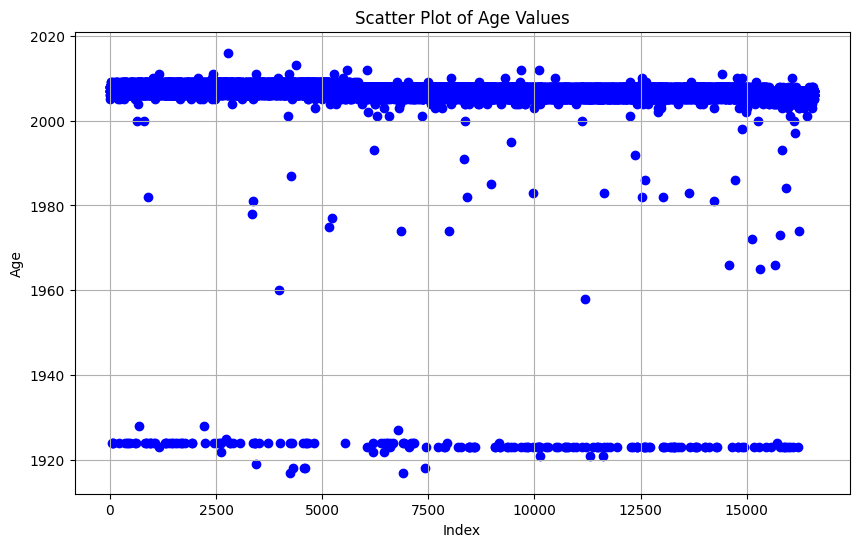

In [399]:
# Plotting a scatter plot for age values
plt.figure(figsize=(10, 6))
plt.scatter(driving_df.index, driving_df['year'], color='blue')
plt.title('Scatter Plot of Age Values')
plt.xlabel('Index')
plt.ylabel('Age')
plt.grid(True)

# Show the scatter plot
plt.show()

In [400]:
driving_df[driving_df['year'] < 1960]

,class_date,city,state,zip_code,dob,gender,month,day,year,Class Date,date_of_birth,age
48,8/15/24,Fort Mill,South Carolina,29715,10/24/24,Female,10,24,1924,2024-08-15,1924-10-24,99
63,8/15/24,Newberry,South Carolina,29108,10/14/24,Female,10,14,1924,2024-08-15,1924-10-14,99
84,8/15/24,Lexington,South Carolina,29073,8/8/24,Male,8,8,1924,2024-08-15,1924-08-08,100
223,8/17/24,little mountain,South Carolina,29075,11/3/24,Female,11,3,1924,2024-08-17,1924-11-03,99
349,8/9/24,Columbia,South Carolina,29223,9/20/24,Female,9,20,1924,2024-08-09,1924-09-20,99
...,...,...,...,...,...,...,...,...,...,...,...,...
15909,3/4/23,Fort Mill,South Carolina,29708,8/17/23,Female,8,17,1923,2023-03-04,1923-08-17,99
15964,3/1/23,Saluda,South Carolina,29138,5/25/23,Male,5,25,1923,2023-03-01,1923-05-25,99
16013,2/25/23,Prosperity,South Carolina,29127,8/10/23,Female,8,10,1923,2023-02-25,1923-08-10,99
16086,2/25/23,Fort Mill,South Carolina,29715,8/29/23,Male,8,29,1923,2023-02-25,1923-08-29,99


In [401]:
driving_df

,class_date,city,state,zip_code,dob,gender,month,day,year,Class Date,date_of_birth,age
0,8/17/24,Richburg,South Carolina,29729,11/30/07,Male,11,30,2007,2024-08-17,2007-11-30,16
1,8/10/24,Bluffton,South Carolina,29910-7957,10/16/07,Male,10,16,2007,2024-08-10,2007-10-16,16
2,8/14/24,Hampton,South Carolina,29924,7/3/08,Female,7,3,2008,2024-08-14,2008-07-03,16
3,8/9/24,Columbia,South Carolina,29210,10/10/06,Female,10,10,2006,2024-08-09,2006-10-10,17
4,8/17/24,Irmo,South Carolina,29063,12/23/06,Female,12,23,2006,2024-08-17,2006-12-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,2/25/23,Chesnee,South Carolina,29323,11/16/05,Female,11,16,2005,2023-02-25,2005-11-16,17
16594,2/4/23,Greenville,South Carolina,29607,5/22/07,Male,5,22,2007,2023-02-04,2007-05-22,15
16595,2/4/23,Greenwood,South Carolina,29649,7/15/06,Female,7,15,2006,2023-02-04,2006-07-15,16
16596,2/8/23,Boiling Springs,South Carolina,29316,2/17/06,Male,2,17,2006,2023-02-08,2006-02-17,16


In [402]:
print(np.min(driving_df['age']))
print(np.max(driving_df['age']))

8
107


In [403]:
driving_df['year'].describe()

,year
count,16598.000000
mean,2005.994156
std,9.077457
min,1917.000000
25%,2006.000000
50%,2007.000000
75%,2008.000000
max,2016.000000


# ***B.1 - > 50.86% are Male and 49.14% are Female.***



In [406]:
((driving_df['gender'].value_counts() / len(driving_df)) * 100)

,count
gender,
Male,50.86155
Female,49.13845


# ***Both gender groups have August as their peak class taking month. And they are least likely to take the class  in October-December. Overall, their distribution is relatively similar.***

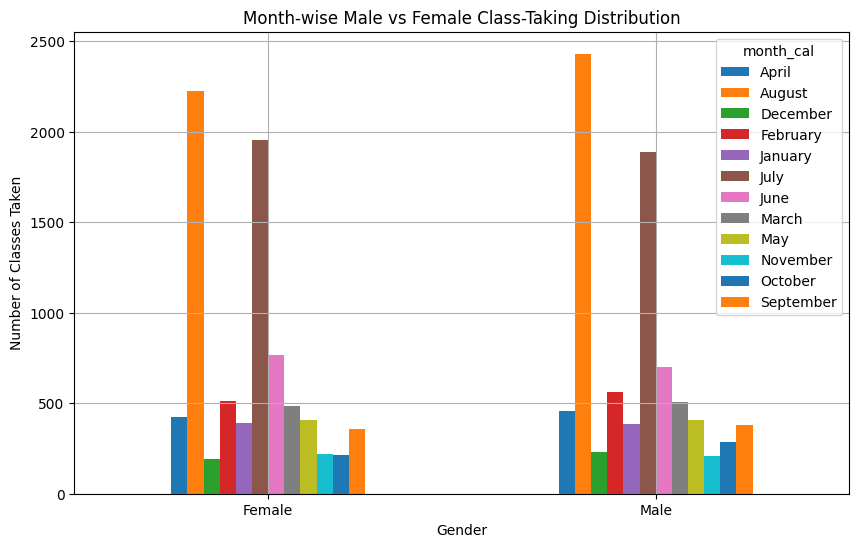

In [407]:
# Extract the month from the 'Class Date'
driving_df['month_cal'] = driving_df['Class Date'].dt.strftime('%B')  # Get the full month name

# Group by gender and month, and count the number of classes taken
class_distribution = driving_df.groupby(['gender', 'month_cal']).size().unstack(fill_value=0)

# Plotting the distribution
class_distribution.plot(kind='bar', figsize=(10, 6))
plt.title("Month-wise Male vs Female Class-Taking Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Classes Taken")
plt.xticks(rotation=0)
plt.grid(True)

# Show the plot
plt.show()

#***Assumptions are:***
  1. You can't be 7 year old and take the class.
  2. It's more likely that and 107 year old is taking the class than 7 year old.
  

In [408]:
# average age of students based on gender
driving_df.groupby('gender')['age'].mean()


,age
gender,
Female,16.945071
Male,16.917792


In [424]:
driving_df['city'].value_counts()

,count
city,
Lexington,1499
Columbia,1357
Fort Mill,1260
Mount Pleasant,871
Easley,679
...,...
Clober,1
Patrick,1
Mc Connells,1


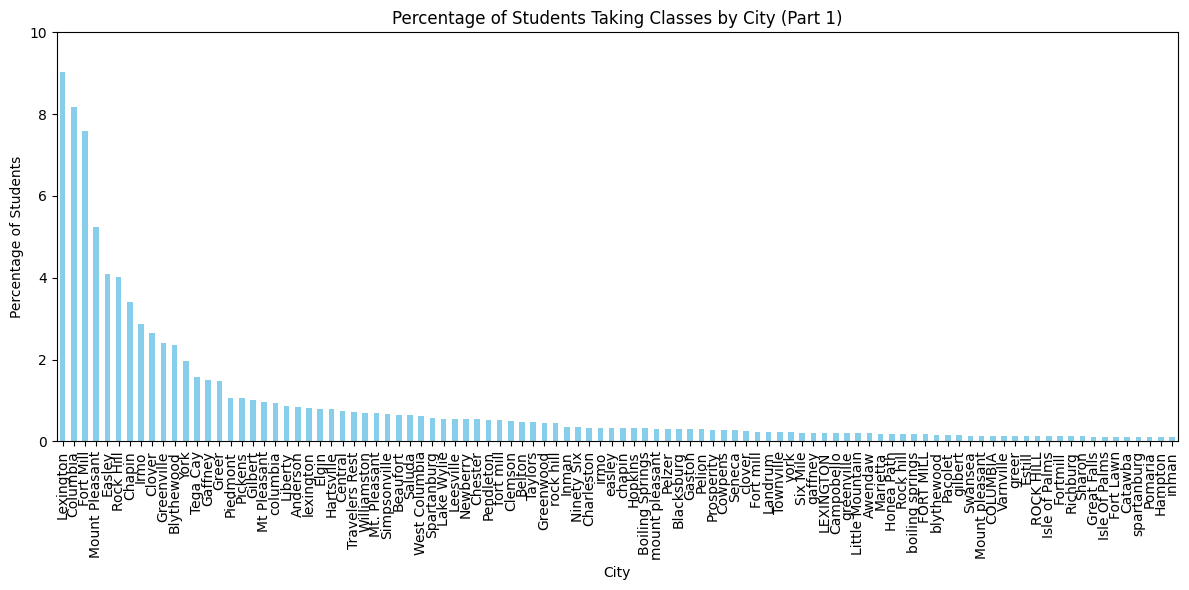

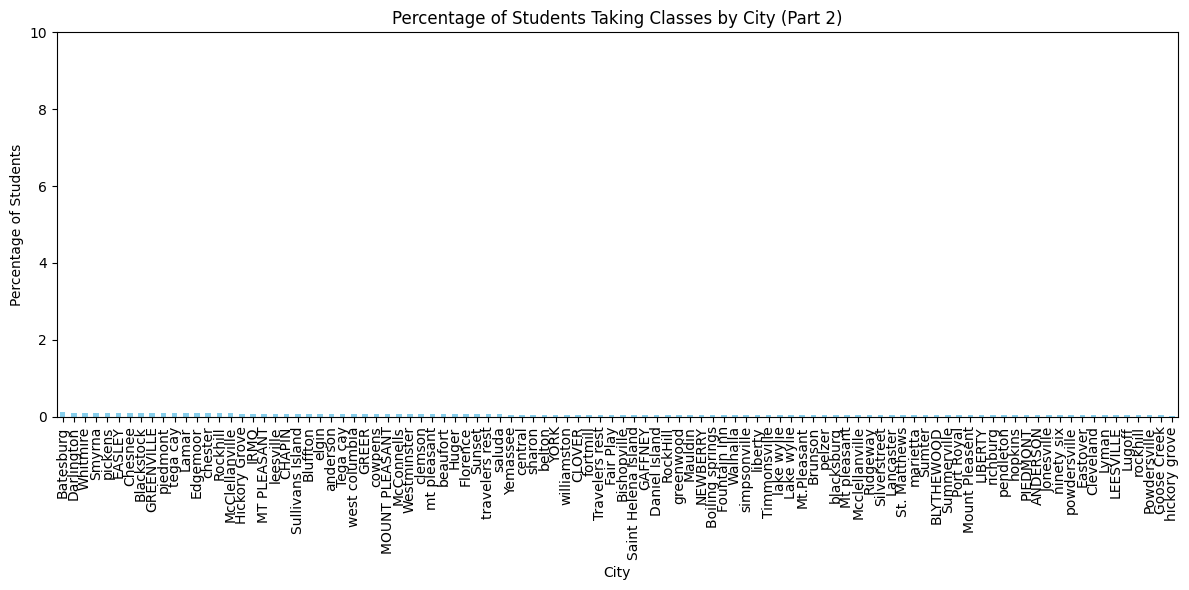

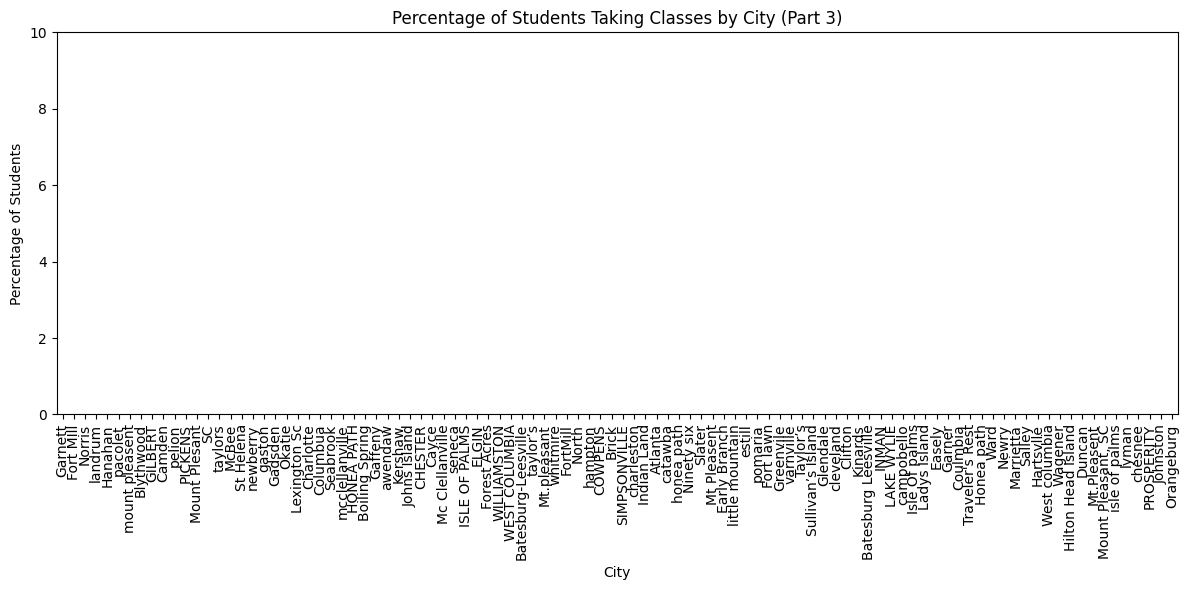

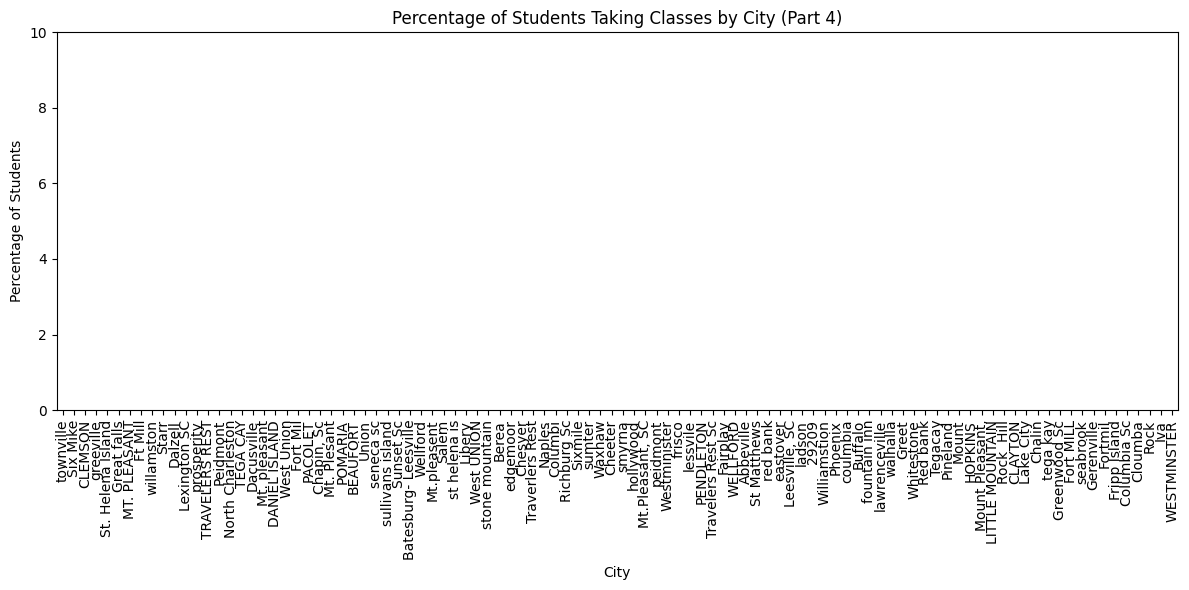

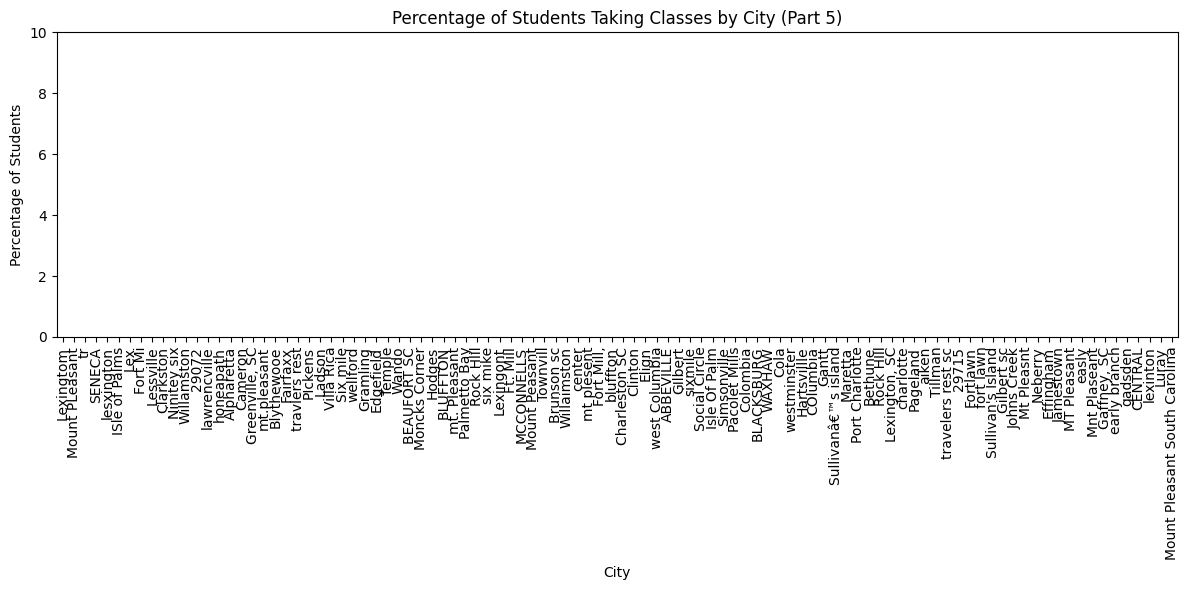

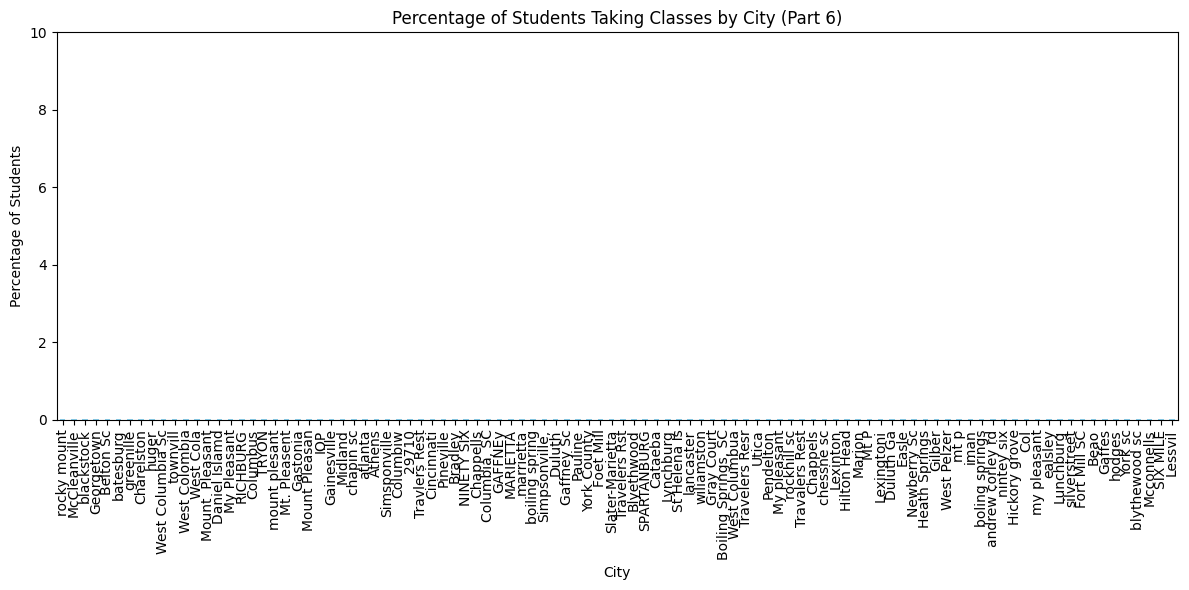

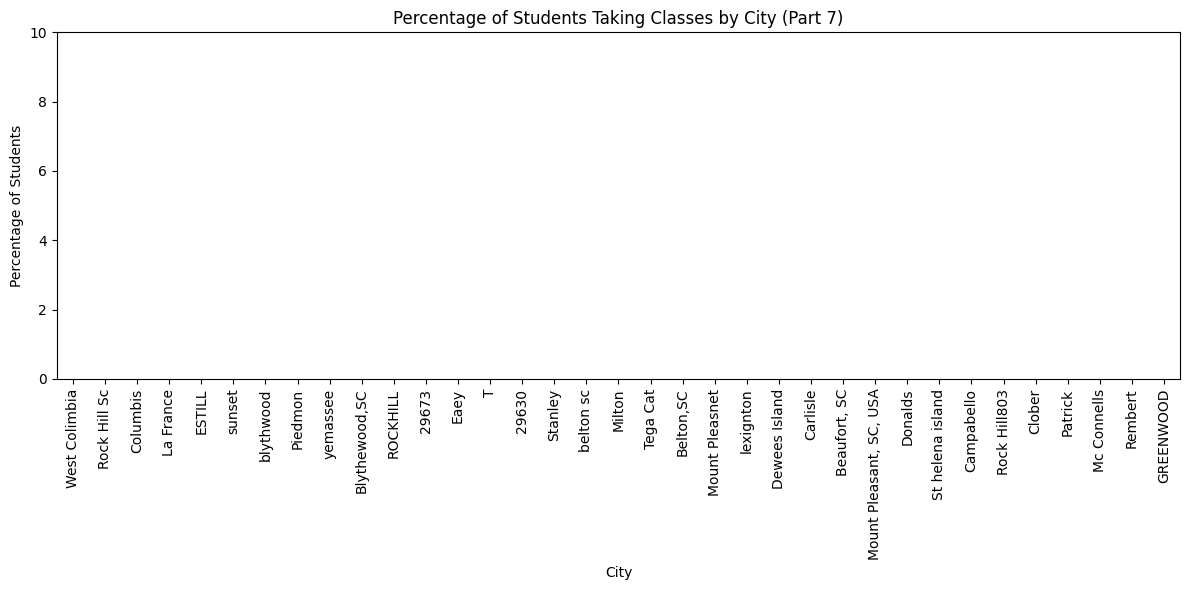

In [426]:
# Group by city and count the number of students in each city, then calculate the percentage
city_distribution = driving_df['city'].value_counts(normalize=True) * 100

# Split into chunks of 100 cities each
chunk_size = 100
chunks = [city_distribution[i:i + chunk_size] for i in range(0, len(city_distribution), chunk_size)]

# Find the maximum y-axis limit for consistent scaling across all graphs
y_max = np.ceil(city_distribution.max())

# Plot each chunk
for i, chunk in enumerate(chunks):
    plt.figure(figsize=(12, 6))
    chunk.plot(kind='bar', color='skyblue')
    plt.title(f"Percentage of Students Taking Classes by City (Part {i+1})")
    plt.xlabel("City")
    plt.ylabel("Percentage of Students")
    plt.ylim(0, y_max)  # Set the same scale for all plots
    plt.xticks(rotation=90)
    plt.grid(False)

    # Show each chunk as a separate figure
    plt.tight_layout()
    plt.show()
